#기존에는 음성 파일을 비트(박자)단위로 분할하여 진행하려고 했습니다.

- 다만 여러 곡에 대한 비트 감지 부분이 자동적으로 진행하기에는 너무 까다로운 조건이라 처음에 진행하려고 했던 파일은 75 Bpm이었기에, 75 단위로 분할하여 진행하려고 했습니다.

- 이 부분에 대해서는 전처리가 이루어지지도, 테스트용 모델을 제작하기도 전이었기 때문에 너무 추상적인 진행이라 판단되어 제외되었습니다.

- 심지어 Bpm이라고 할지라도, 한 박자 안에 여러 번의 코드 진행이 있을 경우에는 그거에 대한 처리를 따로 해주어야 했기 때문에 시간관계상 이 방법을 채택하지 못했습니다.

In [ ]:
y, sr = librosa.load(audio_path)

In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [ ]:
beat_segments = librosa.effects.split(y, top_db=20)


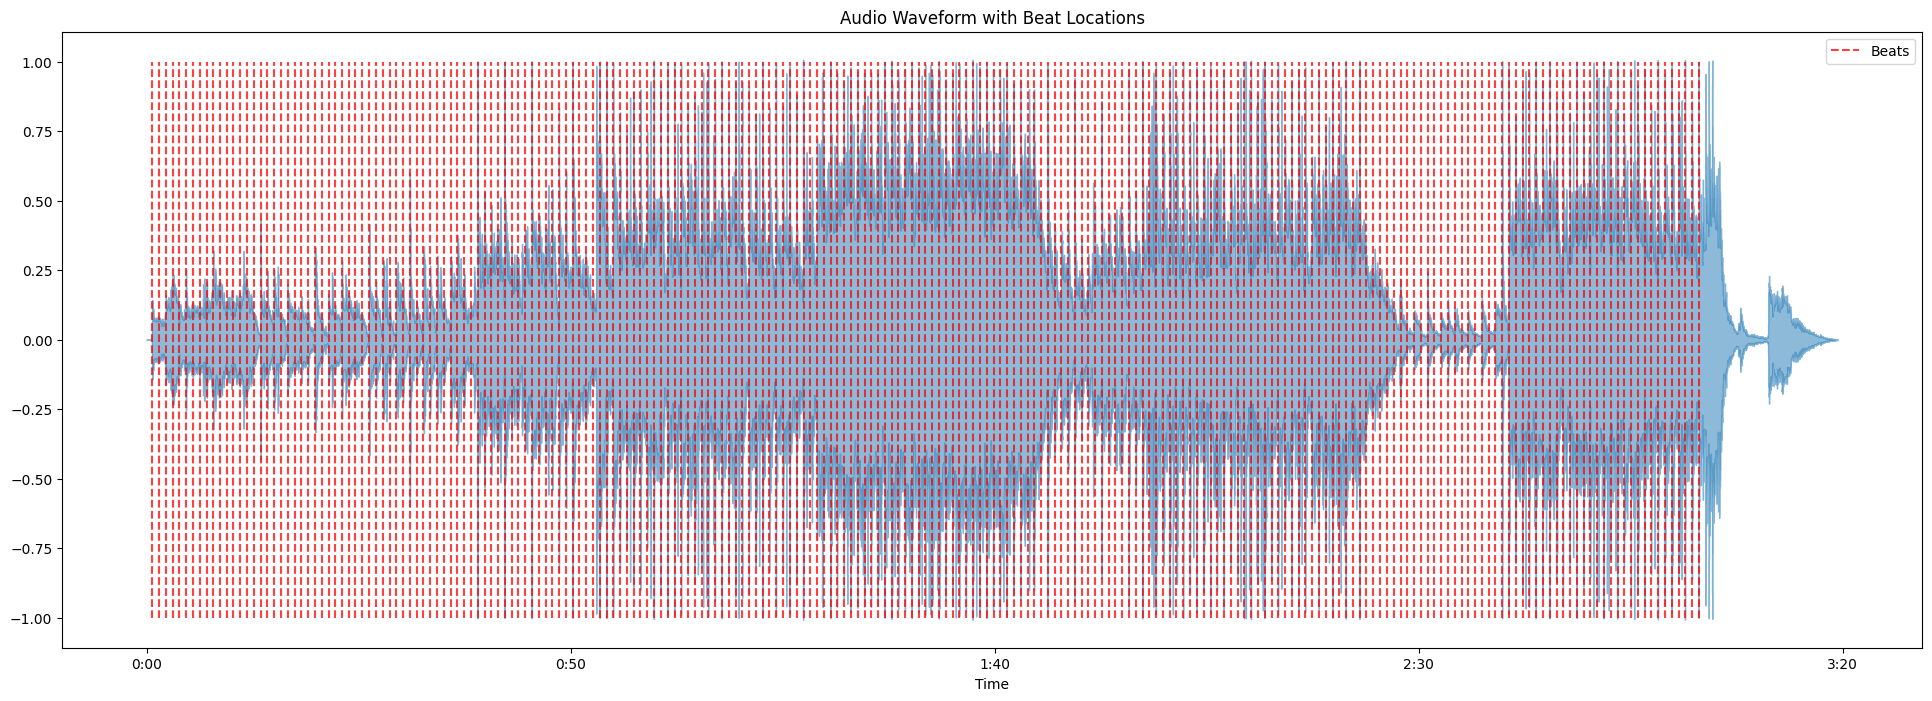

In [ ]:
plt.figure(figsize=(24, 8))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.75, linestyle='--', label='Beats')
plt.title('Audio Waveform with Beat Locations')
plt.legend()
plt.show()

In [ ]:
import IPython.display as ipd

In [ ]:
start_frame = beat_segments[1][0]
end_frame = beat_segments[2][1]


In [ ]:
selected_segment = y[start_frame:end_frame]


In [ ]:
ipd.Audio(selected_segment, rate=sr)
